<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/TensorFlow/_004_Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from PIL import Image
from io import BytesIO

In [2]:
from keras import datasets, layers, models

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_img(img):
   plt.figure(figsize=(2,2))
   plt.imshow(img)
   plt.show()

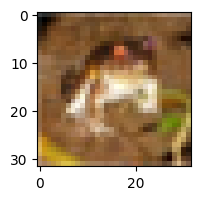

frog


In [9]:
plot_img(x_train[0])
print(class_names[y_train[0][0]])

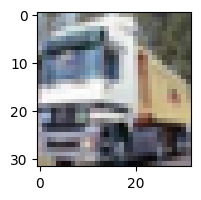

truck


In [10]:
plot_img(x_train[1])
print(class_names[y_train[1][0]])

In [11]:
print(y_train[:5])
print(y_train.shape)

[[6]
 [9]
 [9]
 [4]
 [1]]
(50000, 1)


In [12]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
# Clear the current TensorFlow session
tf.keras.backend.clear_session()

In [16]:
# Define the CNN model using the Sequential API
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)  # Output layer with 10 units (one for each class in CIFAR-10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
# Train the model on the training data
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 53ms/step - accuracy: 0.3335 - loss: 1.7878 - val_accuracy: 0.5191 - val_loss: 1.3093
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5456 - loss: 1.2694 - val_accuracy: 0.5716 - val_loss: 1.2154
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.6125 - loss: 1.1107 - val_accuracy: 0.6272 - val_loss: 1.0533
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.6541 - loss: 0.9895 - val_accuracy: 0.6585 - val_loss: 0.9744
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.6841 - loss: 0.9016 - val_accuracy: 0.6310 - val_loss: 1.0723
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7058 - loss: 0.8391 - val_accuracy: 0.6877 - val_loss: 0.9004
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7238 - loss: 0.7876 - val_accuracy: 0.6888 - val_loss: 0.8965
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7421 - loss: 0

In [18]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 4s - 11ms/step - accuracy: 0.6822 - loss: 0.9288
Test accuracy: 0.6822


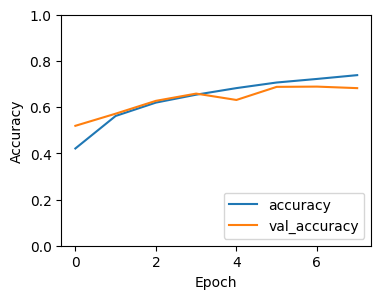

In [19]:
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

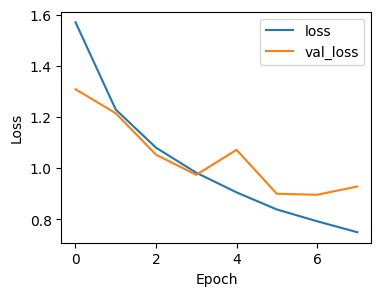

In [20]:
# Plot the loss over epochs
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [21]:
# Save the model
model.save("cifar10_model.h5")

In [41]:
def preprocess_image(path):
    img = Image.open(path).convert('RGB')
    # Resize the image to match the input shape of the model (32x32 pixels)
    img = img.resize((32, 32))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Plot the image (assuming you have a function plot_img to visualize it)
    plot_img(img)

    # Normalize the image array
    img_array = img_array / 255.0

    # Expand the dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

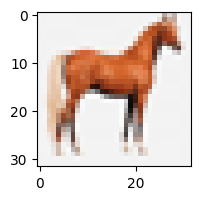

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [33]:
img1 = preprocess_image("/content/horse.png")   # source > repo/src/

pred = model.predict(img1)

In [34]:
pred

array([[-0.6292005, -8.043702 , -0.2536987, -0.2505889,  5.1215124,
         2.8756368, -4.6878686, 13.431536 , -9.827597 , -8.848618 ]],
      dtype=float32)

In [35]:
predicted_class = np.argmax(pred, axis=1)[0]

In [36]:
# Print the predicted class name
print(f'Predicted class: {class_names[predicted_class]}')

Predicted class: horse


In [42]:
def predict(path):
    img_array = preprocess_image(path)
    # Make predictions
    predictions = model.predict(img_array)
    # Get the index of the highest probability class
    predicted_class = np.argmax(predictions, axis=1)[0]
    # Return the class name
    return class_names[predicted_class]

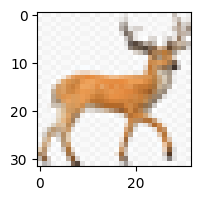

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
deer


In [44]:
img2 = "/content/test3.png"
print(predict(img2))